The second dataset is a telelcom dataset where you have to predict whether the customer is going to churn (leave the telecom company) or not

In [1]:
pwd

'C:\\Users\\puhuan\\Midterm project'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
churn=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [5]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [7]:
#Changing from int to categorical
churn['SeniorCitizen']=pd.Categorical(churn['SeniorCitizen']) 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null category
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: category(1), float64(

In [8]:
churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
churn.drop(['customerID'],axis=1,inplace=True)

In [10]:
numerics = ['float64', 'int64']
numeric_ds = churn.select_dtypes(include=numerics)
objects_ds = churn.select_dtypes(exclude=numerics)

In [11]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
objects_ds.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
churn.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

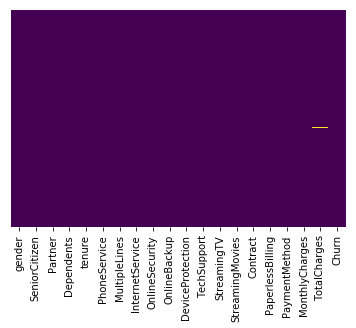

In [14]:
sns.heatmap(churn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
churn=churn.dropna()

In [17]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

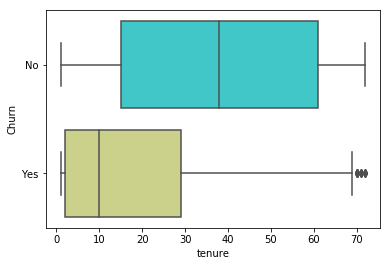

In [18]:
sns.boxplot(x="tenure", y="Churn", data=churn,palette='rainbow')

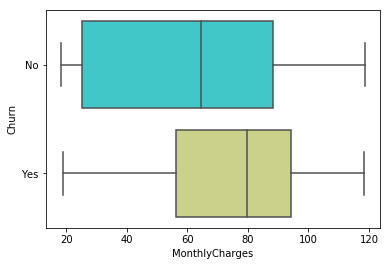

In [19]:
sns.boxplot(x="MonthlyCharges", y="Churn", data=churn,palette='rainbow')

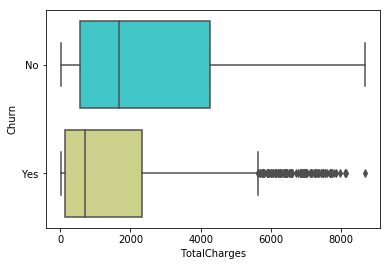

In [20]:
sns.boxplot(x="TotalCharges", y="Churn", data=churn,palette='rainbow')

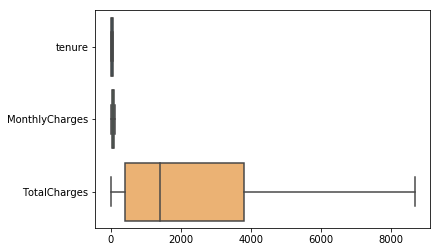

In [21]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=numeric_ds ,palette='rainbow',orient='h')

[]

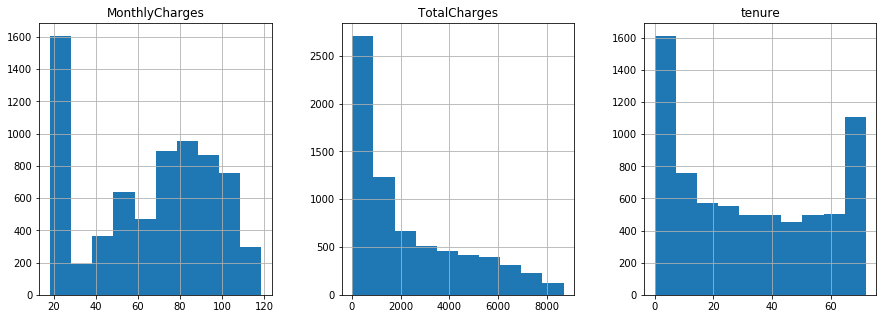

In [22]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

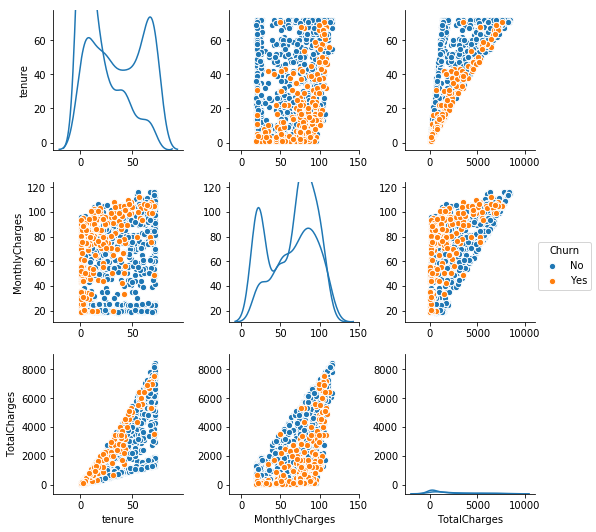

In [23]:
 numeric_ds = pd.concat([numeric_ds,churn["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

Both the ‘tenure’ and the ‘MonthlyCharges’ are looking like good predictors of the ‘Churn’ variable, I will use the violin plot now to decide the bins that I’m going to use.

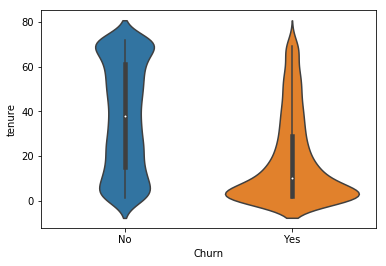

In [24]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

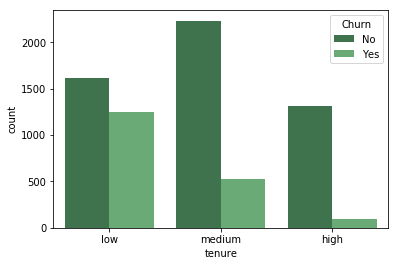

In [25]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

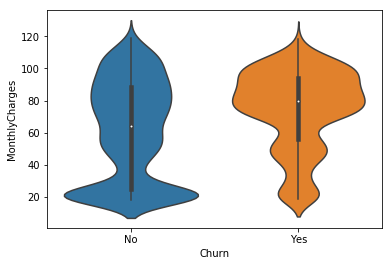

In [26]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

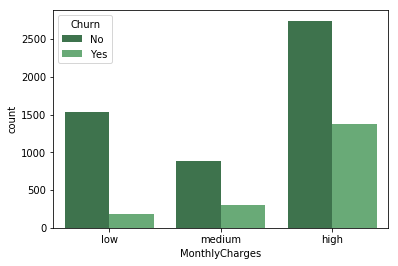

In [27]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

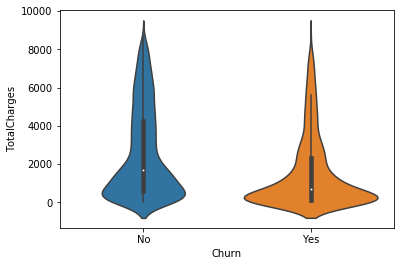

In [28]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

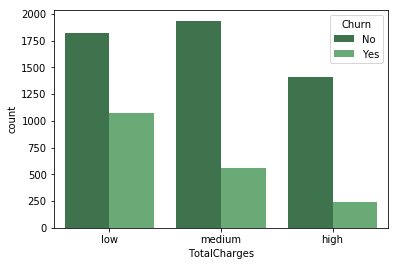

In [29]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

categorical

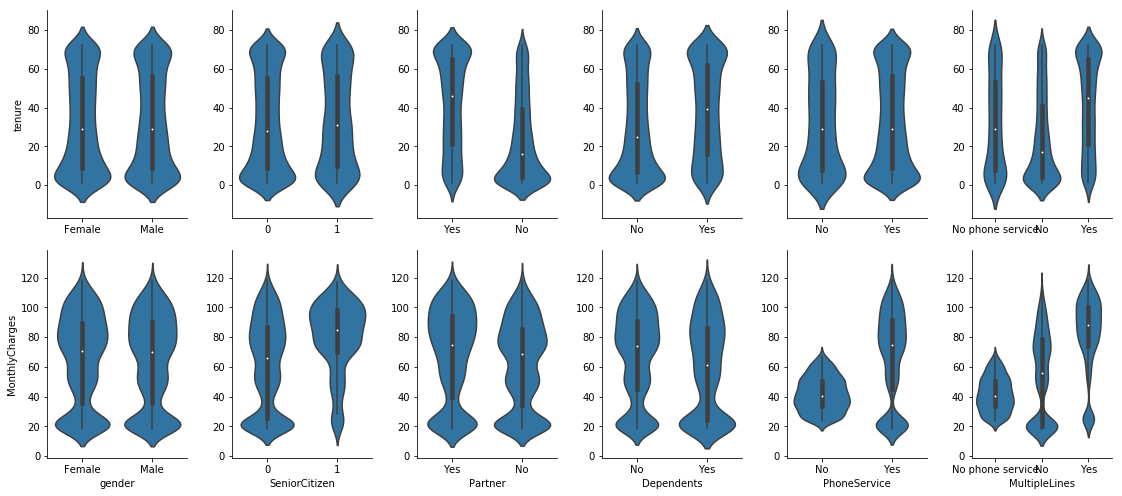

In [30]:
g = sns.PairGrid(churn, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

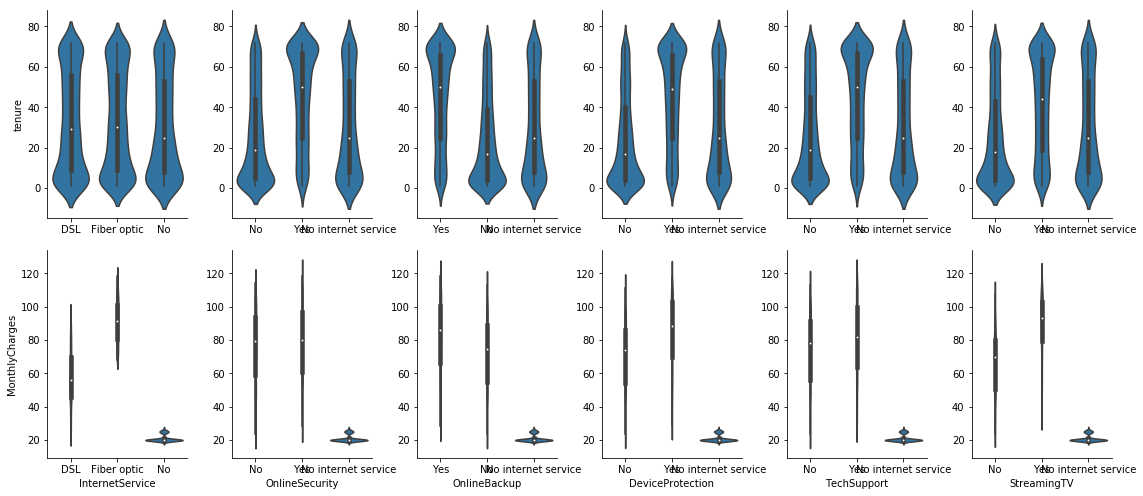

In [31]:
g = sns.PairGrid(churn, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

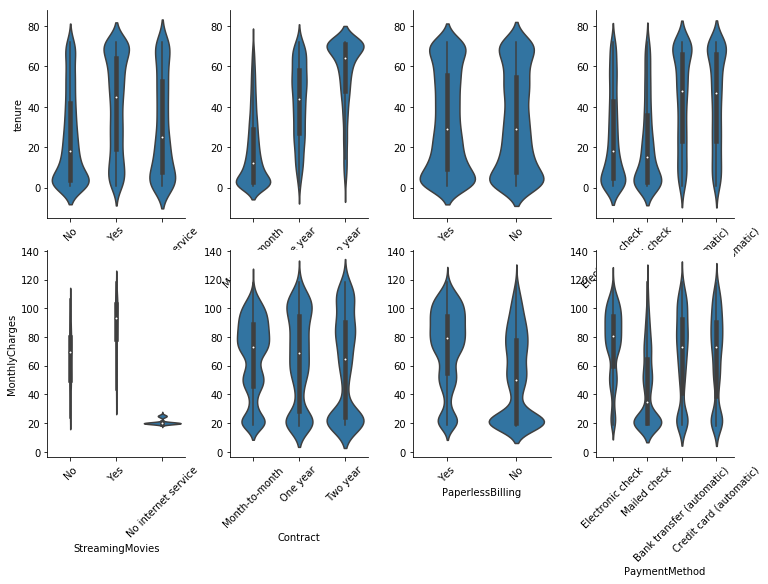

In [32]:
g = sns.PairGrid(churn, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
g.map(sns.violinplot);

categorical

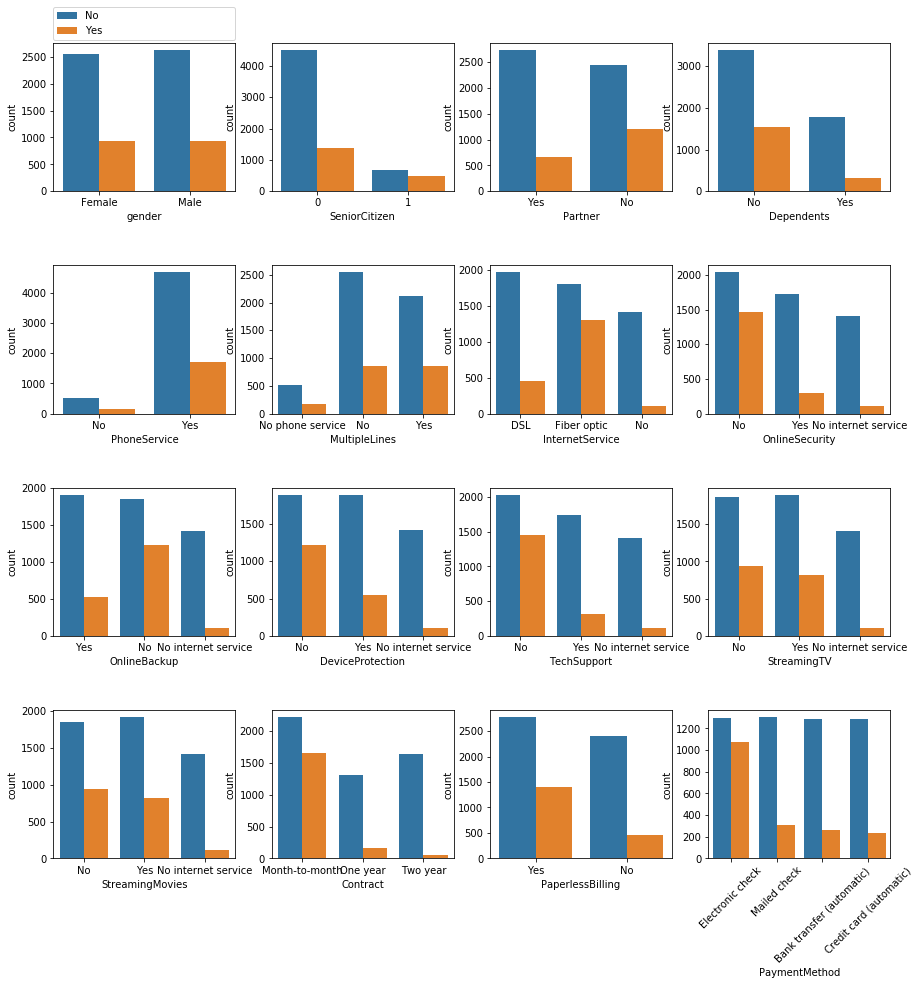

In [33]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

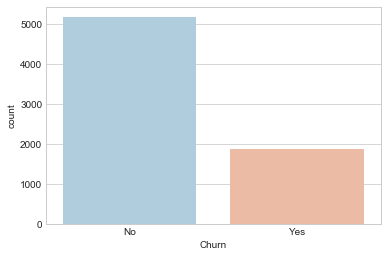

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=churn,palette='RdBu_r')

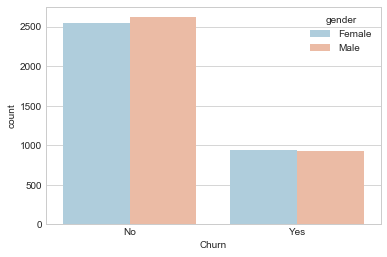

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=churn,palette='RdBu_r')

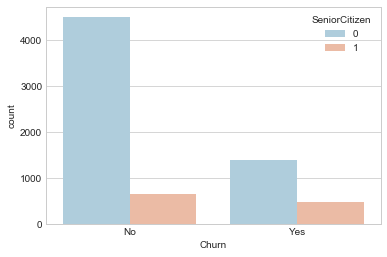

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='SeniorCitizen',data=churn,palette='RdBu_r')

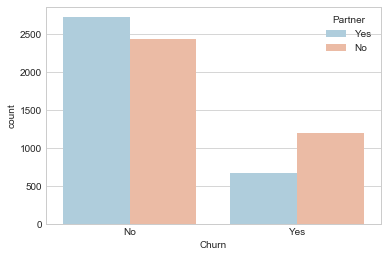

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Partner',data=churn,palette='RdBu_r')

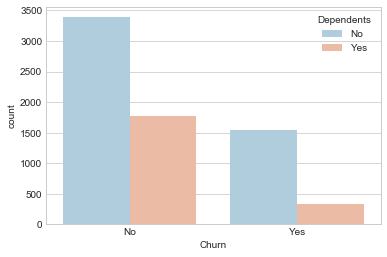

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Dependents',data=churn,palette='RdBu_r')

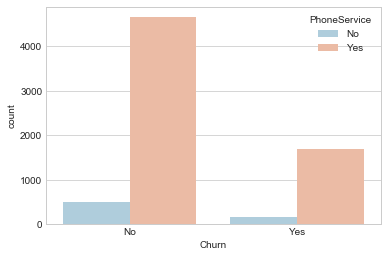

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PhoneService',data=churn,palette='RdBu_r')

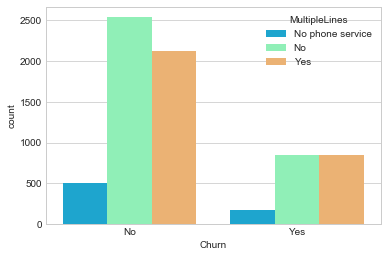

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='MultipleLines',data=churn,palette='rainbow')

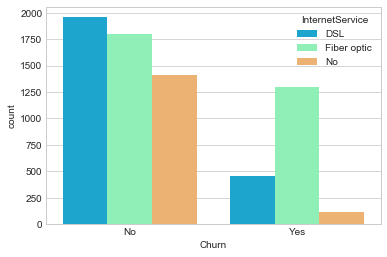

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='InternetService',data=churn,palette='rainbow')

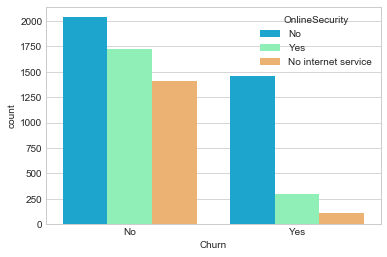

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='OnlineSecurity',data=churn,palette='rainbow')

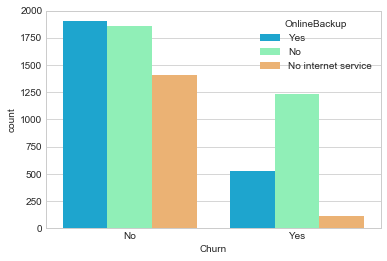

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='OnlineBackup',data=churn,palette='rainbow')

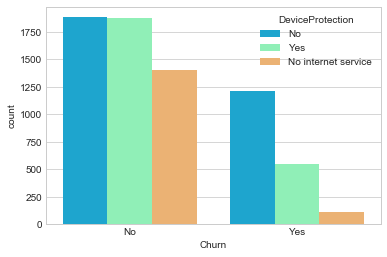

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='DeviceProtection',data=churn,palette='rainbow')

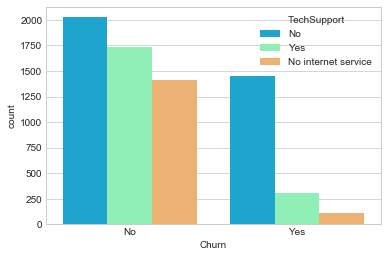

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='TechSupport',data=churn,palette='rainbow')

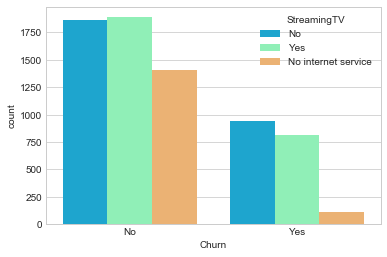

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingTV',data=churn,palette='rainbow')

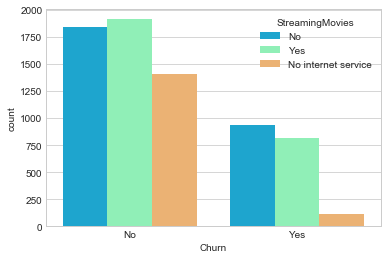

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingMovies',data=churn,palette='rainbow')

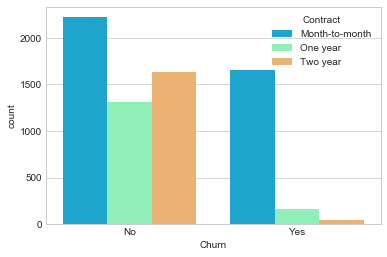

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Contract',data=churn,palette='rainbow')

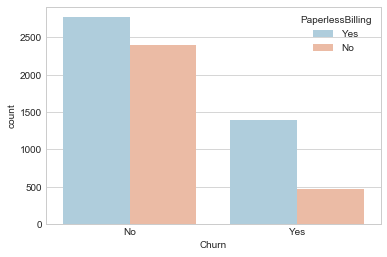

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaperlessBilling',data=churn,palette='RdBu_r')

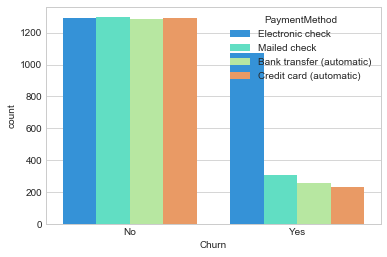

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaymentMethod',data=churn,palette='rainbow')

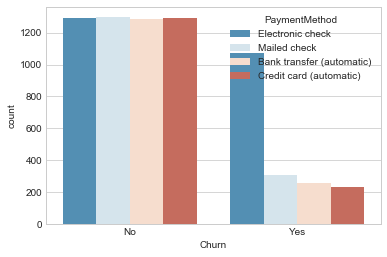

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaymentMethod',data=churn,palette='RdBu_r')

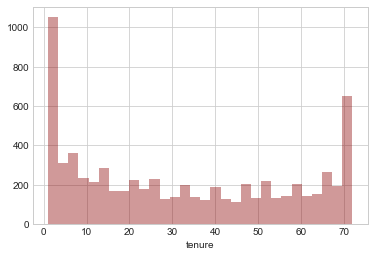

In [52]:
sns.distplot(churn['tenure'].dropna(),kde=False,color='darkred',bins=30)

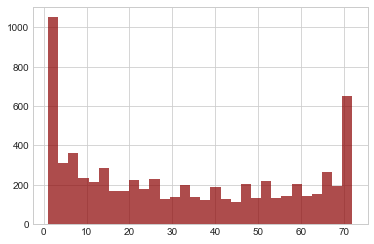

In [53]:
churn['tenure'].hist(bins=30,color='darkred',alpha=0.7)

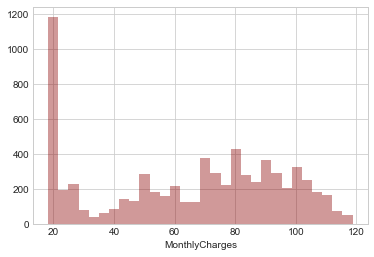

In [54]:
sns.distplot(churn['MonthlyCharges'].dropna(),kde=False,color='darkred',bins=30)

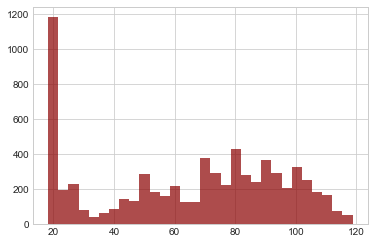

In [55]:
churn['MonthlyCharges'].hist(bins=30,color='darkred',alpha=0.7)

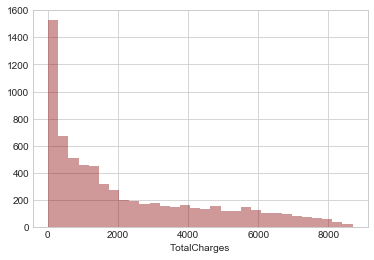

In [56]:
sns.distplot(churn['TotalCharges'].dropna(),kde=False,color='darkred',bins=30)

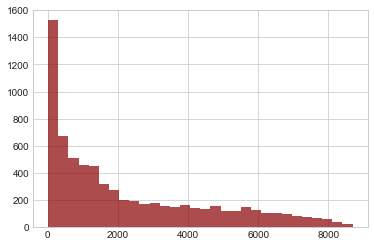

In [57]:
churn['TotalCharges'].hist(bins=30,color='darkred',alpha=0.7)

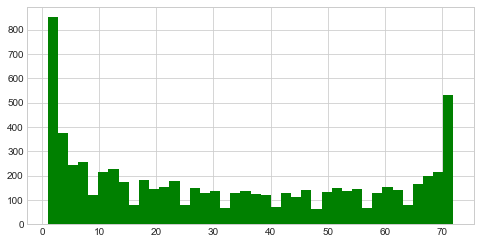

In [58]:
churn['tenure'].hist(color='green',bins=40,figsize=(8,4))

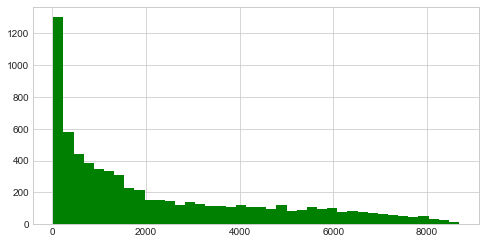

In [59]:
churn['TotalCharges'].hist(color='green',bins=40,figsize=(8,4))

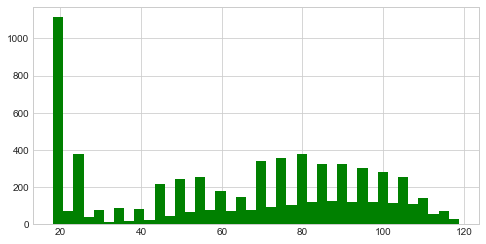

In [60]:
churn['MonthlyCharges'].hist(color='green',bins=40,figsize=(8,4))

## data cleaning

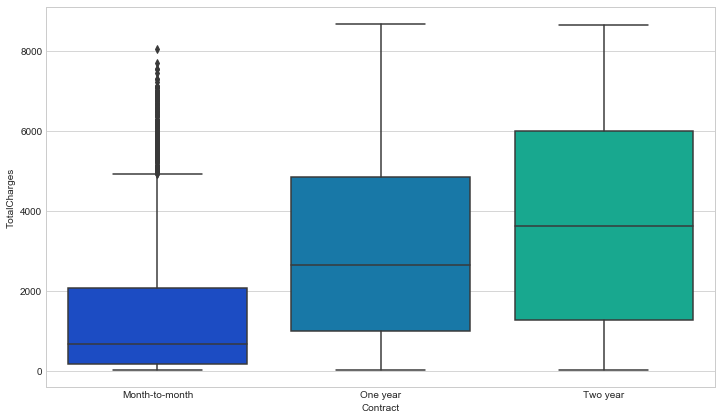

In [61]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Contract',y='TotalCharges',data=churn,palette='winter')

In [62]:
churn.groupby(churn.Contract).mean()

,tenure,MonthlyCharges,TotalCharges
Contract,,,
Month-to-month,18.036645,66.398490,1369.254581
One year,42.073370,65.079416,3034.683084
Two year,57.071810,60.872374,3728.933947


In [63]:
def impute_age(cols):
    Contract = cols[0]
    TotalCharges = cols[1]
    
    if pd.isnull(TotalCharges):

        if Contract == 'Month-to-month':
            return 1369.254581

        elif Contract == 'One year':
            return 3034.683084

        else:
            return 3728.933947

    else:
        return TotalCharges

In [64]:
churn['TotalCharges'] = churn[['Contract','TotalCharges']].apply(impute_age,axis=1)

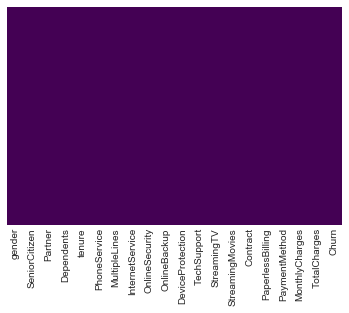

In [65]:
sns.heatmap(churn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null category
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: category(1), float64(2), int64(1), object(16)
memory usage: 1.

In [69]:
for i in list(objects_ds.columns):
    churn[i]= pd.get_dummies(churn[i],drop_first=True)   

In [70]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,0,0,0,0,0,0,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,1,0,0,0,0,0,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


gender = pd.get_dummies(churn['gender'],drop_first=True)
SeniorCitizen= pd.get_dummies(churn['SeniorCitizen'],drop_first=True)
Partner = pd.get_dummies(churn['Partner'],drop_first=True)
Dependents = pd.get_dummies(churn['Dependents'],drop_first=True)
PhoneService= pd.get_dummies(churn['PhoneService'],drop_first=True)
MultipleLines = pd.get_dummies(churn['MultipleLines'],drop_first=True)
InternetService = pd.get_dummies(churn['InternetService'],drop_first=True)
OnlineSecurity= pd.get_dummies(churn['OnlineSecurity'],drop_first=True)
OnlineBackup= pd.get_dummies(churn['OnlineBackup'],drop_first=True)
DeviceProtection = pd.get_dummies(churn['DeviceProtection'],drop_first=True)
TechSupport= pd.get_dummies(churn['TechSupport'],drop_first=True)
StreamingTV = pd.get_dummies(churn['StreamingTV'],drop_first=True)
StreamingMovies = pd.get_dummies(churn['StreamingMovies'],drop_first=True)
Contract= pd.get_dummies(churn['Contract'],drop_first=True)
PaperlessBilling= pd.get_dummies(churn['PaperlessBilling'],drop_first=True)

'gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod','TotalCharges'

In [71]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null uint8
SeniorCitizen       7032 non-null uint8
Partner             7032 non-null uint8
Dependents          7032 non-null uint8
tenure              7032 non-null int64
PhoneService        7032 non-null uint8
MultipleLines       7032 non-null uint8
InternetService     7032 non-null uint8
OnlineSecurity      7032 non-null uint8
OnlineBackup        7032 non-null uint8
DeviceProtection    7032 non-null uint8
TechSupport         7032 non-null uint8
StreamingTV         7032 non-null uint8
StreamingMovies     7032 non-null uint8
Contract            7032 non-null uint8
PaperlessBilling    7032 non-null uint8
PaymentMethod       7032 non-null uint8
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null uint8
dtypes: float64(2), int64(1), uint8(17)
memory usage: 656.5 KB


churn = pd.concat([churn,gender,Partner,Dependents,PhoneService, MultipleLines, InternetService,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling],axis=1)

In [72]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,0,0,0,0,0,0,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,1,0,0,0,0,0,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


## Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
xa=churn.drop('Churn',axis=1)
ya=churn['Churn']
xa


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,0,0,0,0,0,0,1,0,0,56.95,1889.50
2,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,53.85,108.15
3,1,0,0,0,45,0,1,0,0,0,0,0,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65
5,0,0,0,0,8,1,0,1,0,0,0,0,0,0,0,1,0,99.65,820.50
6,1,0,0,1,22,1,0,1,0,0,0,0,0,0,0,1,1,89.10,1949.40
7,0,0,0,0,10,0,1,0,0,0,0,0,0,0,0,0,0,29.75,301.90
8,0,0,1,0,28,1,0,1,0,0,0,0,0,0,0,1,0,104.80,3046.05
9,1,0,0,1,62,1,0,0,0,0,0,0,0,0,1,0,0,56.15,3487.95


In [87]:
X_train, X_test, y_train, y_test = train_test_split(xa, 
                                                    ya, test_size=0.25, 
                                                    random_state=101)

## Training and Predicting

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
predictions = logmodel.predict(X_test)

## Evaluation

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88      1329
          1       0.66      0.48      0.55       429

avg / total       0.80      0.81      0.80      1758



In [93]:
logmodel.coef_

array([[  3.46998009e-02,   4.20865006e-01,   3.34913159e-02,
         -2.24576317e-01,  -5.98266842e-02,  -4.16053719e-01,
          9.55207609e-02,   1.07409241e+00,  -1.20606413e-01,
         -1.20606413e-01,  -1.20606413e-01,  -1.20606413e-01,
         -1.20606413e-01,  -1.20606413e-01,  -4.80744398e-01,
          4.49363462e-01,  -3.22718422e-01,   3.66469806e-03,
          1.76777341e-04]])

In [94]:
df_imp = pd.DataFrame(logmodel.coef_).T
df_imp

,0
0,0.034700
1,0.420865
2,0.033491
3,-0.224576
4,-0.059827
5,-0.416054
6,0.095521
7,1.074092
8,-0.120606
9,-0.120606


In [96]:
feature=xa.columns
feature
df_imp.columns=["importance"]
df_imp["labels"] = feature
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
7,1.074092,InternetService
15,0.449363,PaperlessBilling
1,0.420865,SeniorCitizen
6,0.095521,MultipleLines
0,0.034700,gender


,importance,labels
9,-0.120606,OnlineBackup
3,-0.224576,Dependents
16,-0.322718,PaymentMethod
5,-0.416054,PhoneService
14,-0.480744,Contract


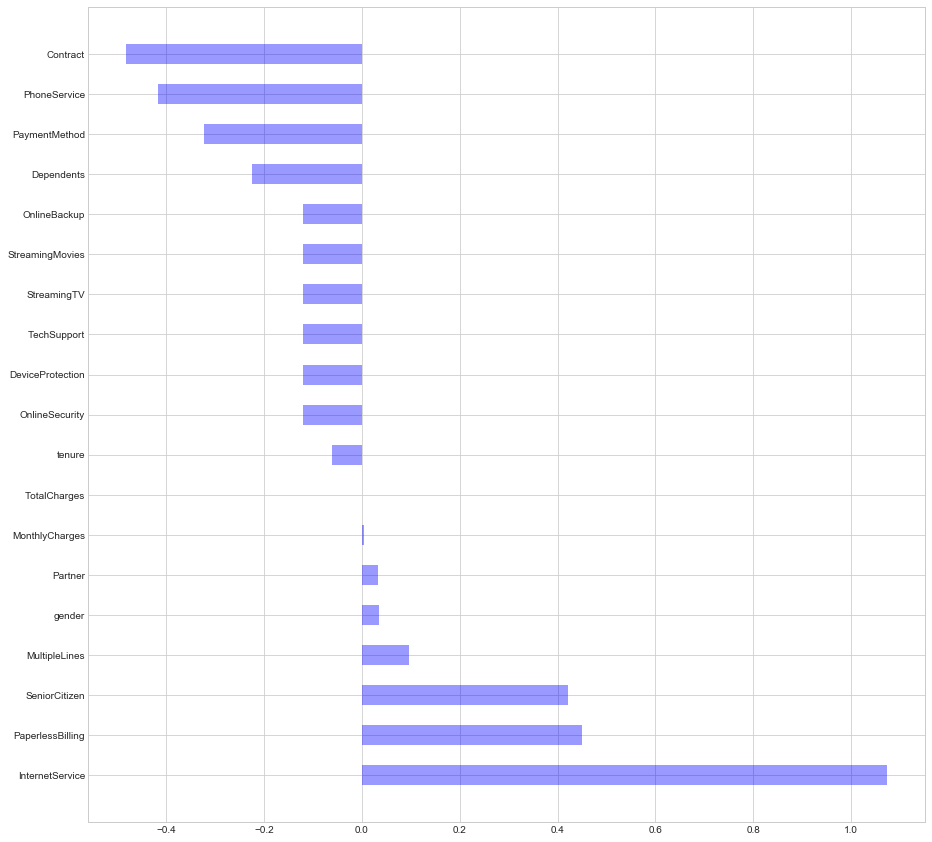

In [97]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()